In [99]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import math
import seaborn as sns

# Artificial Neural Network

In [100]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [101]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [102]:
train.shape,test.shape

((614, 13), (367, 12))

In [103]:
train["source"] = "train"
test["source"] = "test"

In [104]:
data = pd.concat([train,test],ignore_index =True)

In [105]:
data.shape

(981, 14)

# 1. Missing Values

In [106]:
data.isna().sum()

Loan_ID                0
Gender                24
Married                3
Dependents            25
Education              0
Self_Employed         55
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount            27
Loan_Amount_Term      20
Credit_History        79
Property_Area          0
Loan_Status          367
source                 0
dtype: int64

In [107]:
data["Loan_Amount_Term"].unique()

array([360., 120., 240.,  nan, 180.,  60., 300., 480.,  36.,  84.,  12.,
       350.,   6.])

In [108]:
data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
source                object
dtype: object

### Lets change  the data types of categorical features

In [109]:
data["Gender"] = data["Gender"].astype("category")
data["Married"] = data["Married"].astype("category")
data["Dependents"] = data["Dependents"].astype("category")
data["Self_Employed"] = data["Self_Employed"].astype("category")
data["Credit_History"] = data["Credit_History"].astype("category")
data["Education"] = data["Education"].astype("category")
data["Property_Area"] = data["Property_Area"].astype("category")

In [110]:
columns =["Gender","Married","Dependents","Self_Employed","LoanAmount","Loan_Amount_Term","Credit_History"]

### We will replace the categorical values with mode and numerical values with mean

In [111]:
for col in columns:
    if data[col].dtypes == 'float':
        data[col].fillna(data[col].mean(),inplace = True)
    else:
        data[col].fillna(data[col].mode()[0],inplace = True)


In [112]:
data.isna().sum()

Loan_ID                0
Gender                 0
Married                0
Dependents             0
Education              0
Self_Employed          0
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount             0
Loan_Amount_Term       0
Credit_History         0
Property_Area          0
Loan_Status          367
source                 0
dtype: int64

## 2.Univariate Analysis

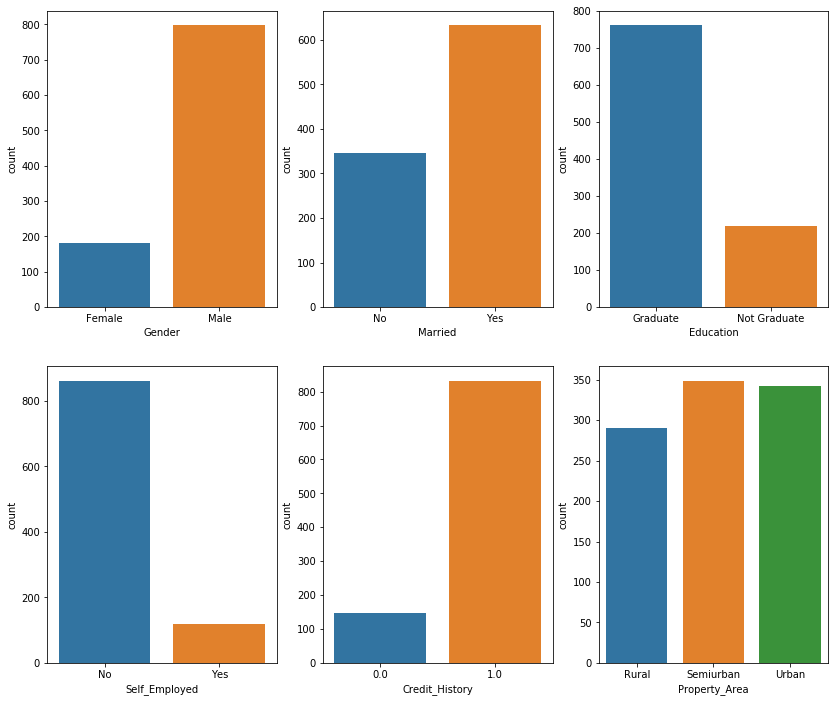

In [113]:
f, axes = plt.subplots(2, 3, figsize=(14, 12))
sns.countplot(x= "Gender",data = data,ax=axes[0, 0])
sns.countplot(x= "Married",data = data,ax=axes[0, 1])
sns.countplot(x= "Education",data = data,ax=axes[0, 2])
sns.countplot(x= "Self_Employed",data = data,ax=axes[1, 0])
sns.countplot(x= "Credit_History",data = data,ax=axes[1, 1])
sns.countplot(x= "Property_Area",data = data,ax=axes[1, 2])
plt.show()

### Following are the observations : 
1. Men take more loan than women
2. Married people take more loan
3. Loan is taken mostly for higher studies
4. People with jobs with private/public sector take more loan
5. people who have repayed previous loan have  more loan application
6. loan is taken mostly for Semiurban area

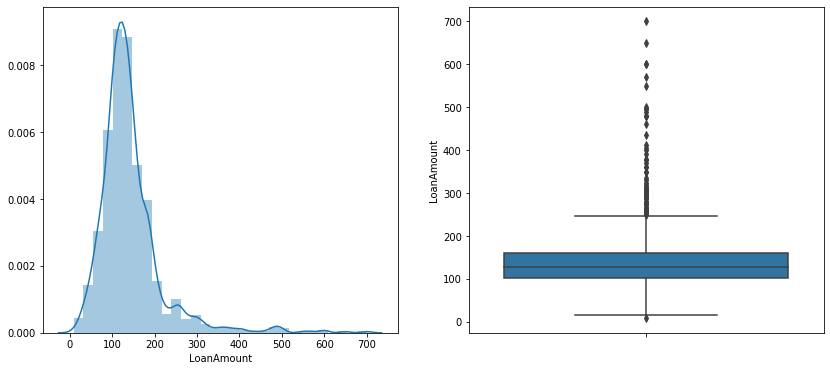

In [114]:
f, axes = plt.subplots(1,2, figsize=(14, 6),squeeze=False)
sns.distplot(data["LoanAmount"],bins = 30,ax = axes[0][0])
sns.boxplot(data["LoanAmount"],orient = "v",ax = axes[0][1])
plt.show()

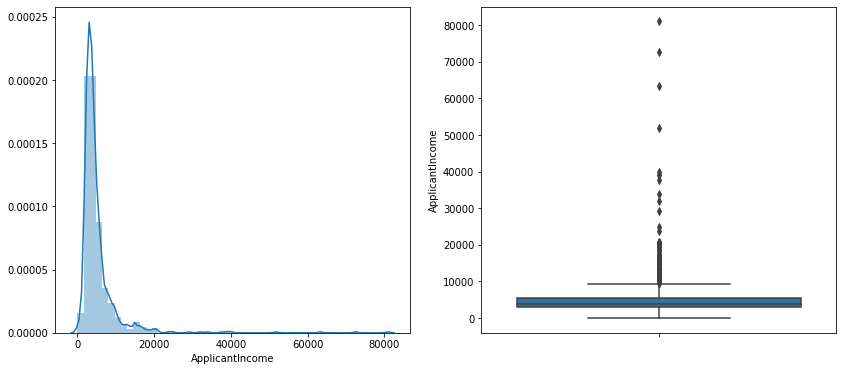

In [115]:
f, axes = plt.subplots(1,2, figsize=(14, 6),squeeze=False)
sns.distplot(data["ApplicantIncome"],bins = 50,ax = axes[0][0])
sns.boxplot(data["ApplicantIncome"],orient = "v",ax = axes[0][1])
plt.show()

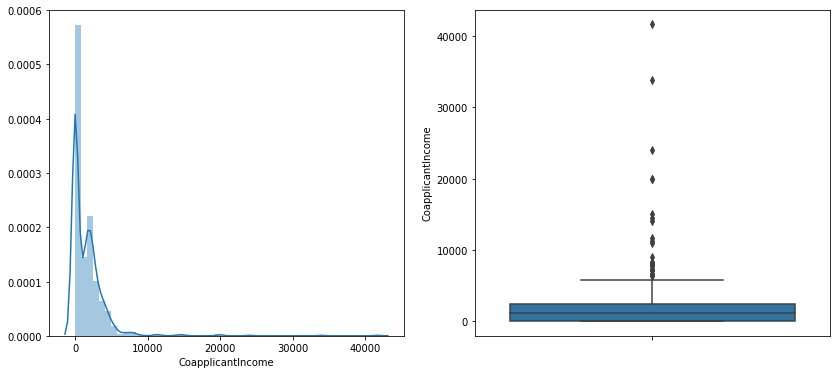

In [116]:
f, axes = plt.subplots(1,2, figsize=(14, 6),squeeze=False)
sns.distplot(data["CoapplicantIncome"],bins = 50,ax = axes[0][0])
sns.boxplot(data["CoapplicantIncome"],orient = "v",ax = axes[0][1])
plt.show()

# 3.Multivariate Analysis

### Lets see how applicant income makes difference in Loan approval

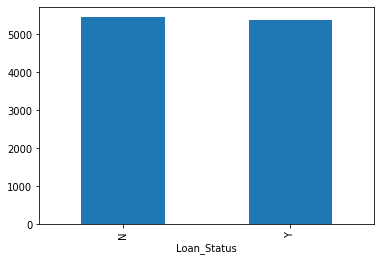

In [117]:
df_ApIncome = data.groupby("Loan_Status")["ApplicantIncome"].mean()
df_ApIncome.plot(kind = "bar")

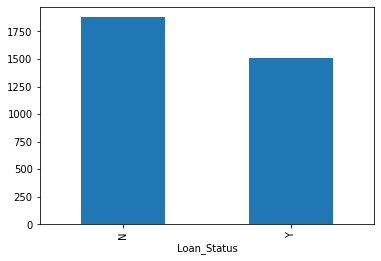

In [118]:
df_CoIncome = data.groupby("Loan_Status")["CoapplicantIncome"].mean()
df_CoIncome.plot(kind = "bar")

### There is not much affect of either incomes on Loan Status. Lets combine both the incomes and see the outcome

In [119]:
data["Total_Income"] = data["ApplicantIncome"] + data["CoapplicantIncome"]

In [120]:
bins=[0,2500,4000,6000,81000] 
group=['Low','Average','High', 'Very high']
data['Total_Income_bin']=pd.cut(data['Total_Income'],bins,labels=group)

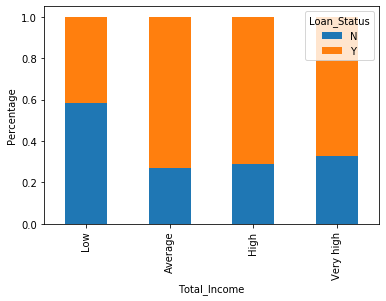

In [121]:
Total_Income_bin=pd.crosstab(data['Total_Income_bin'],data['Loan_Status']) 
Total_Income_bin.div(Total_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.xlabel('Total_Income') 
P = plt.ylabel('Percentage')

### Low income has more disapproval of loan than higher income

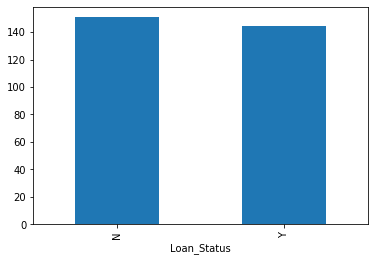

In [122]:
df_LoanAmt = data.groupby("Loan_Status")["LoanAmount"].mean()
df_LoanAmt.plot(kind = "bar")

<Figure size 864x576 with 0 Axes>

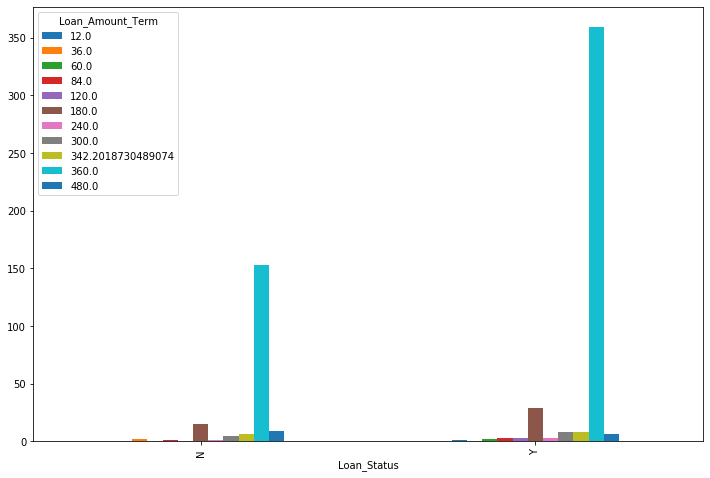

In [123]:
plt.figure(figsize = (12,8))
df_Term = data.groupby("Loan_Status")["Loan_Amount_Term"].value_counts()
df_Term.unstack().plot(kind = "bar",figsize = (12,8))
plt.show()

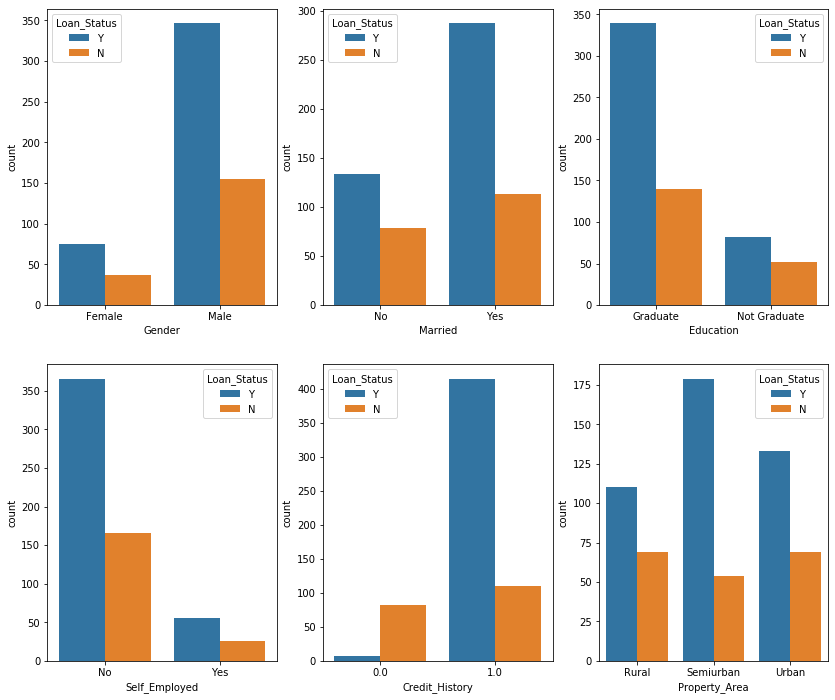

In [124]:

f, axes = plt.subplots(2, 3, figsize=(14, 12))
sns.countplot(x= "Gender",hue = "Loan_Status",data = data,ax=axes[0, 0])
sns.countplot(x= "Married",hue = "Loan_Status",data = data,ax=axes[0, 1])
sns.countplot(x= "Education",hue = "Loan_Status",data = data,ax=axes[0, 2])
sns.countplot(x= "Self_Employed",hue = "Loan_Status",data = data,ax=axes[1, 0])
sns.countplot(x= "Credit_History",hue = "Loan_Status",data = data,ax=axes[1, 1])
sns.countplot(x= "Property_Area",hue = "Loan_Status",data = data,ax=axes[1, 2])
plt.show()

In [125]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,source,Total_Income,Total_Income_bin
0,LP001002,Male,No,0,Graduate,No,5849,0.0,142.51153,360.0,1.0,Urban,Y,train,5849.0,High
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.00000,360.0,1.0,Rural,N,train,6091.0,Very high
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.00000,360.0,1.0,Urban,Y,train,3000.0,Average
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.00000,360.0,1.0,Urban,Y,train,4941.0,High
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.00000,360.0,1.0,Urban,Y,train,6000.0,High


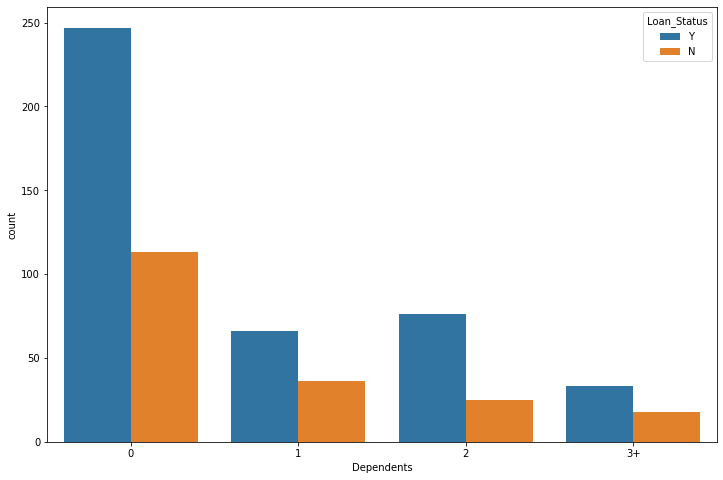

In [126]:
plt.figure(figsize=(12, 8))
sns.countplot(x= "Dependents",hue = "Loan_Status",data = data)
plt.show()

In [127]:
data["Dependents"].replace({"3+":"Y","1" :"Y","0" : "N","2":"Y" },inplace = True)

In [128]:
data["Dependents"].value_counts()

N    570
Y    411
Name: Dependents, dtype: int64

In [129]:
data.shape

(981, 16)

# 4. Outliers

### We saw that the distribution of Loan Amount and Income is not normal and there are outliers. So we will convert them to log and check the distribution again.

In [130]:
data["LoanAmount"] = np.log(data["LoanAmount"])

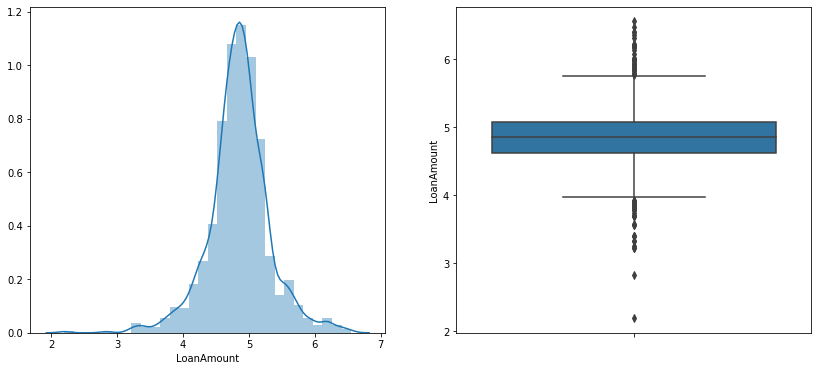

In [131]:
f, axes = plt.subplots(1,2, figsize=(14, 6),squeeze=False)
sns.distplot(data["LoanAmount"],bins = 30,ax = axes[0][0])
sns.boxplot(data["LoanAmount"],orient = "v",ax = axes[0][1])
plt.show()

In [132]:
data["Total_Income"] = np.log(data["Total_Income"])

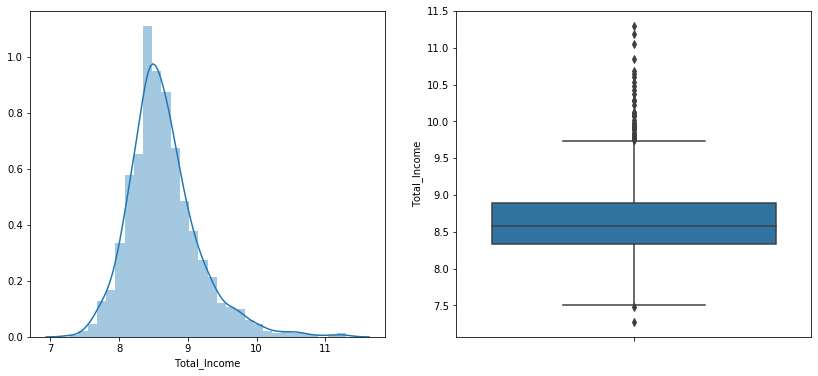

In [133]:
f, axes = plt.subplots(1,2, figsize=(14, 6),squeeze=False)
sns.distplot(data["Total_Income"],bins = 30,ax = axes[0][0])
sns.boxplot(data["Total_Income"],orient = "v",ax = axes[0][1])
plt.show()

# 5. Get Dummies

In [134]:
cat_col = ["Gender","Married","Dependents","Education","Self_Employed","Credit_History","Property_Area","Loan_Status"]

In [135]:
data = pd.get_dummies(data,columns=cat_col,drop_first=True)

In [136]:
data.head()

,Loan_ID,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,source,Total_Income,Total_Income_bin,Gender_Male,Married_Yes,Dependents_Y,Education_Not Graduate,Self_Employed_Yes,Credit_History_1.0,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,LP001002,5849,0.0,4.959423,360.0,train,8.674026,High,1,0,0,0,0,1,0,1,1
1,LP001003,4583,1508.0,4.852030,360.0,train,8.714568,Very high,1,1,1,0,0,1,0,0,0
2,LP001005,3000,0.0,4.189655,360.0,train,8.006368,Average,1,1,0,0,1,1,0,1,1
3,LP001006,2583,2358.0,4.787492,360.0,train,8.505323,High,1,1,0,1,0,1,0,1,1
4,LP001008,6000,0.0,4.948760,360.0,train,8.699515,High,1,0,0,0,0,1,0,1,1


In [137]:
data.shape

(981, 17)

In [138]:
data.drop(["ApplicantIncome","CoapplicantIncome","Total_Income_bin"],axis = 1,inplace = True)

In [139]:
train = data.loc[data["source"] == "train"]
test = data.loc[data["source"] == "test"]

In [140]:
train.drop(["source"],axis = 1,inplace = True)
test.drop(["source","Loan_Status_Y"],axis = 1,inplace = True)

C:\Users\Admin\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [141]:
train.shape,test.shape

((614, 13), (367, 12))

In [142]:
train.rename(columns = {"Loan_Status_Y" : "Loan_Status"}, inplace = True)

C:\Users\Admin\anaconda3\lib\site-packages\pandas\core\frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [143]:
train.head()

,Loan_ID,LoanAmount,Loan_Amount_Term,Total_Income,Gender_Male,Married_Yes,Dependents_Y,Education_Not Graduate,Self_Employed_Yes,Credit_History_1.0,Property_Area_Semiurban,Property_Area_Urban,Loan_Status
0,LP001002,4.959423,360.0,8.674026,1,0,0,0,0,1,0,1,1
1,LP001003,4.852030,360.0,8.714568,1,1,1,0,0,1,0,0,0
2,LP001005,4.189655,360.0,8.006368,1,1,0,0,1,1,0,1,1
3,LP001006,4.787492,360.0,8.505323,1,1,0,1,0,1,0,1,1
4,LP001008,4.948760,360.0,8.699515,1,0,0,0,0,1,0,1,1


In [144]:
target = "Loan_Status"
IDcol = ["Loan_ID"]
features = [x for x in train.columns if x not in [target]+IDcol]

# Normalization

In [145]:
from sklearn.preprocessing import MinMaxScaler

In [146]:
scaler = MinMaxScaler()

In [147]:
train[features] = scaler.fit_transform(train[features])

C:\Users\Admin\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Admin\anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [148]:
test[features] = scaler.fit_transform(test[features])

C:\Users\Admin\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Admin\anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


# 5. Cross Validation and Modeling

### Stratified 

In [149]:
from sklearn.model_selection import StratifiedKFold

In [150]:
X = train[features].values
y = train[target]

In [151]:
skf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)

In [152]:
for train_index,test_index in skf.split(X,y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

### We have divided the train data into training and validation data sets - X_train, X_test, y_train, y_test

In [153]:
from sklearn.metrics import confusion_matrix, precision_recall_curve, auc, roc_auc_score, roc_curve, recall_score, classification_report,f1_score

# ANN 

In [154]:
train.head()

,Loan_ID,LoanAmount,Loan_Amount_Term,Total_Income,Gender_Male,Married_Yes,Dependents_Y,Education_Not Graduate,Self_Employed_Yes,Credit_History_1.0,Property_Area_Semiurban,Property_Area_Urban,Loan_Status
0,LP001002,0.634426,0.74359,0.347590,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1
1,LP001003,0.609760,0.74359,0.357654,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0
2,LP001005,0.457624,0.74359,0.181853,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1
3,LP001006,0.594936,0.74359,0.305712,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1
4,LP001008,0.631977,0.74359,0.353918,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1


In [155]:

from keras.models import Sequential
from keras.layers import Dense, Activation,Dropout
from keras.constraints import max_norm

In [156]:
from keras.callbacks import EarlyStopping

In [157]:
early_stop = EarlyStopping(patience=10)

In [158]:
model = Sequential()

# add input layer
model.add(Dense(78,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(39,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(19,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(units=1,activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam',metrics =['accuracy'])

In [159]:
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

In [160]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=50,
          batch_size=256,
          validation_data=(X_test, y_test),
          callbacks=[early_stop]
          )

Train on 492 samples, validate on 122 samples
Epoch 1/50
492/492 [==============================] - 1s 3ms/step - loss: 0.7069 - acc: 0.4776 - val_loss: 0.6845 - val_acc: 0.5902
Epoch 2/50
492/492 [==============================] - 0s 28us/step - loss: 0.6886 - acc: 0.5650 - val_loss: 0.6640 - val_acc: 0.6475
Epoch 3/50
492/492 [==============================] - 0s 28us/step - loss: 0.6667 - acc: 0.6016 - val_loss: 0.6476 - val_acc: 0.6885
Epoch 4/50
492/492 [==============================] - 0s 30us/step - loss: 0.6512 - acc: 0.6504 - val_loss: 0.6352 - val_acc: 0.6885
Epoch 5/50
492/492 [==============================] - 0s 30us/step - loss: 0.6277 - acc: 0.6687 - val_loss: 0.6276 - val_acc: 0.6885
Epoch 6/50
492/492 [==============================] - 0s 28us/step - loss: 0.6311 - acc: 0.6789 - val_loss: 0.6228 - val_acc: 0.6885
Epoch 7/50
492/492 [==============================] - 0s 41us/step - loss: 0.6167 - acc: 0.6809 - val_loss: 0.6190 - val_acc: 0.6885
Epoch 8/50
492/492 [====

In [161]:
losses = pd.DataFrame(model.history.history)

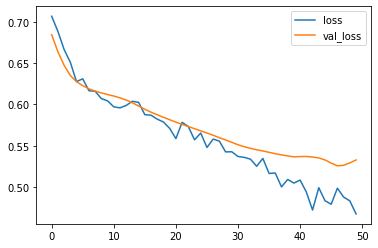

In [162]:
losses[['loss','val_loss']].plot()

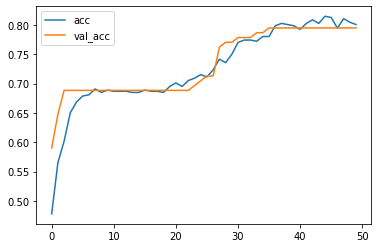

In [163]:
losses[['acc','val_acc']].plot()

In [164]:
predictions = model.predict_classes(X_test)

In [165]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.93      0.37      0.53        38
           1       0.78      0.99      0.87        84

    accuracy                           0.80       122
   macro avg       0.85      0.68      0.70       122
weighted avg       0.82      0.80      0.76       122



In [166]:
cm = confusion_matrix(y_test,predictions)

[[14 24]
 [ 1 83]]


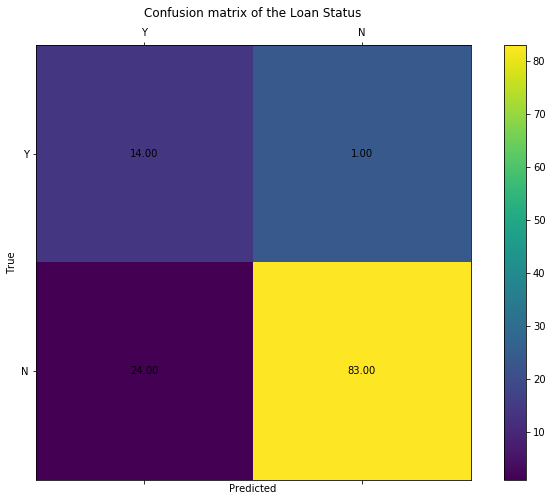

In [167]:
labels = ['Y','N']
fig = plt.figure(figsize = (12,8))
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the Loan Status')
fig.colorbar(cax)
ax.set_xticklabels(['']+labels)
ax.set_yticklabels(['']+labels)
plt.xlabel('Predicted')
plt.ylabel('True')
print(cm)

for (x, y), value in np.ndenumerate(cm):
    plt.text(x, y, f"{value:.2f}", va="center", ha="center")
plt.show()

# Prediction

In [168]:
test_pred = model.predict_classes(test[features])

In [169]:
IDcol.append(target)

In [170]:
test["Loan_Status"] = model.predict_classes(test[features])

C:\Users\Admin\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [171]:
test.head()

,Loan_ID,LoanAmount,Loan_Amount_Term,Total_Income,Gender_Male,Married_Yes,Dependents_Y,Education_Not Graduate,Self_Employed_Yes,Credit_History_1.0,Property_Area_Semiurban,Property_Area_Urban,Loan_Status
614,LP001015,0.459506,0.746835,0.316956,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1
615,LP001022,0.505111,0.746835,0.256950,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1
616,LP001031,0.673447,0.746835,0.363465,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1
617,LP001035,0.427498,0.746835,0.274577,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1
618,LP001051,0.344057,0.746835,0.167078,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1


In [172]:
test.shape

(367, 13)

In [173]:
test["Loan_Status"].replace( 0,"N",inplace = True)
test["Loan_Status"].replace(1,"Y",inplace = True)

C:\Users\Admin\anaconda3\lib\site-packages\pandas\core\generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [174]:
test.shape

(367, 13)

In [175]:
submission= test[["Loan_ID","Loan_Status"]]

In [176]:
submission.head()

,Loan_ID,Loan_Status
614,LP001015,Y
615,LP001022,Y
616,LP001031,Y
617,LP001035,Y
618,LP001051,Y


In [177]:
submission.shape

(367, 2)

In [178]:
submission.to_csv("submission.csv",index = False)